<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_YB_week5_2_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###04 _ 분류

####01 분류(Classification)의 개요

- 지도학습: 레이블(Label), 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 분류(Classification): 학습 데이터로 주어진 데이터의 피처, 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델 생성하고, 생성된 모델에 새로운 데이터 값 주어졌을 때 미지의 레이블 값 예측하는 것

분류는 다양한 머신러닝 알고리즘으로 구현 가능
- 앙상블 방법(Esemble Method): 배깅(Bagging) + 부스팅(Boosting)
- 결정 트리: 앙상블의 기분 알고리즘으로 사용하는 것

####02 결정 트리

결정 트리(Decidion Tree): 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
- 규칙 노드(Desicion Node): 규칙 조건
- 리프 노드(Leaf Node): 결정된 클래스 값
- 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성 => 규칙 노드 생성
- 트리의 깊이(depth)가 깊어질수록 트리 예측 성능이 저하될 가능성이 높음
- 최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할(split)

결정 노드: 정보 균일도 높은 데이터 먼저 선택할 수 있도록 규칙 조건을 만듦

=> 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 만듦

=> 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복

=> 정보 이득(Information Gain) 지수, 지니 계수

- 정보 이득 엔트로피: 주어진 데이터 집합의 혼잡도
- 지니 계수: 경제학에서 불평등 지수 나타낼 때 사용하는 계수

**결정 트리 모델의 특징**

결정 트리 가장 큰 장점 정보 '균일도' 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적

<장점>
- 쉽고 직관적
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도 크지 않음

<단점>
- 과적합으로 알고리즘 성능이 떨어짐

**결정 트리 파라미터**

- min_samples_split: 노드 분할하기 위한 최소 샘플 데이터수로 과적합 제어
- min_samples_leaf: 분할 될 경우 왼쪽, 오른쪽 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
- max_features: 최적 분할을 위해 고려할 최대 피처 개수
- max_depth: 트리 최대 깊이 규정
- max_leaf_nodes: 말단 노드(leaf) 최대 개수

**결정 트리 모델의 시각화**

Graphviz 패키지: 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

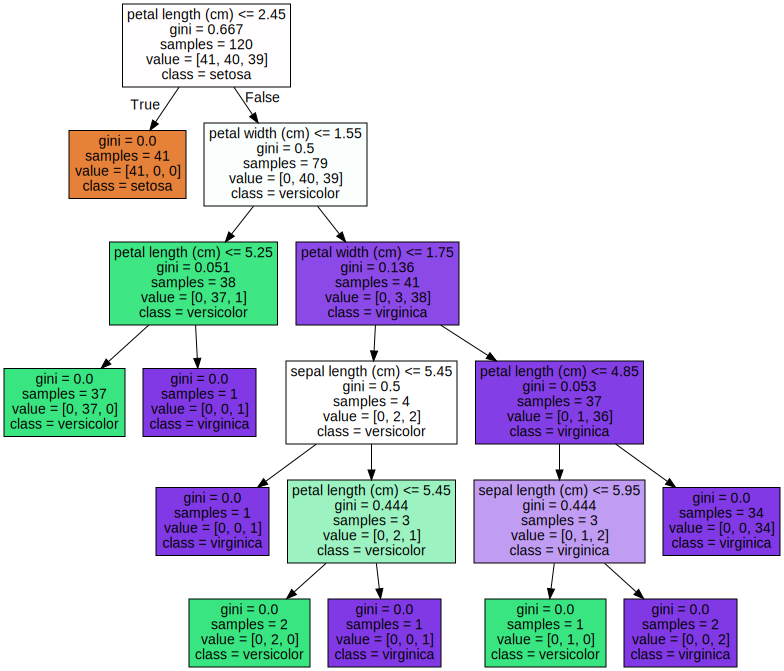

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm): <= 2.45 자식 노드를 만들기 위한 규칙 조건
- gini: value=[]로 주어진 데이터 분포에서의 지니 계수
- samples: 현 규칙에 해당하는 데이터 건수
- value=[]: 클래스 값 기반의 데이터 건수

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어감 => 쉽게 과적합 => 과적합 상당히 높은 ML 알고리즘

min_samples_split 하이퍼 파라미터 변경에 따른 규칙 트리 변화: 자식 노드로 분할하기 위한 최소 샘플 개수가 4개 필요한데 3개밖에 없어 더 이상 자식 규칙 노드를 분할 하지 않고 리프 노드가 됨 => 더 간결한 결정 트리

min_samples_leaf 하이퍼 파라미터 변경에 따른 결정 트리 변화: 값을 키우면 분할될 때 자식 노드 모두가 해당 조건을 만족하기 어려운 조건이 되어 더 이상 분할되지 않고 리프 노트가 됨

균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요 요건
- 중요한 몇 개의 피처가 명확한 규칙 트리 만드는 데 크게 기여
- 좀 더 간결하고 이상치에 강한 모델을 만들 수 있음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

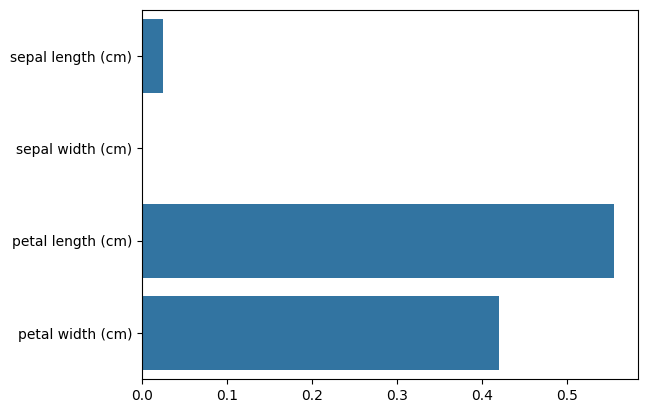

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**결정 트리 과적합(Overfitting)**

- make_classification(): 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 하는 사이킷런 함수

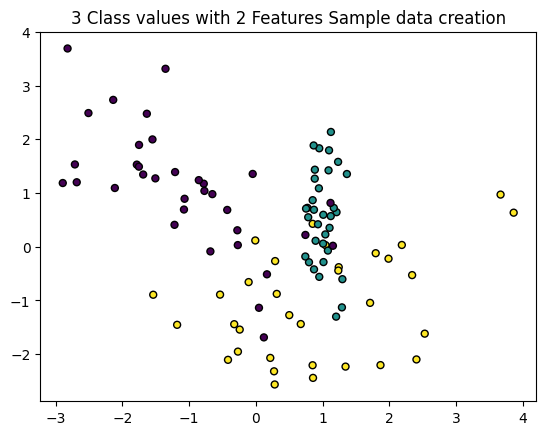

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

첫 번째 학습: 결정 트리 생성에 별다른 제약이 없도록 결정 트리 하이퍼 파라미터를 디폴드 -> 결정 트리 모델이 어떤 결정 기준을 갖고 분할하면서 데이터를 분류하는지 확인
- visualize_boundary(): 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해하도록 함

In [5]:
def visualize_boundary(model, X, y):
    # X의 두 feature에 대해서만 그리기 위해 2차원 공간으로 한정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 학습된 모델로 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k', marker='o')
    plt.show()

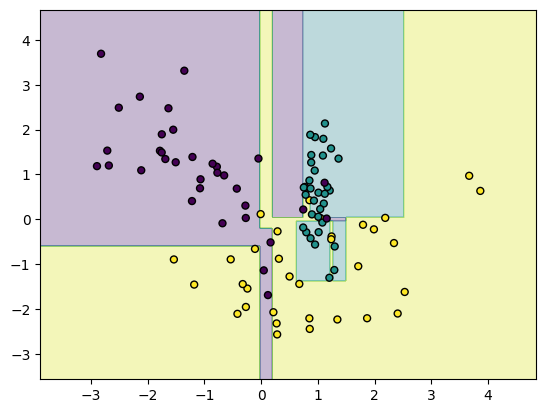

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

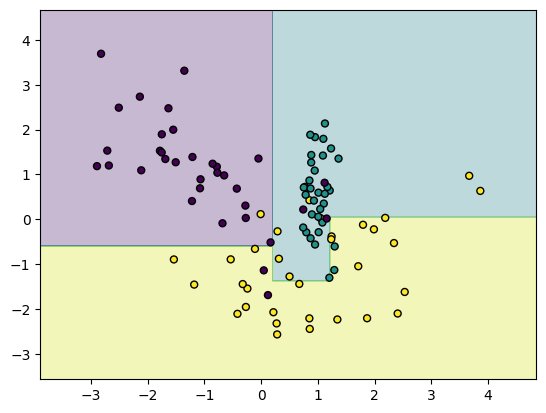

In [7]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**
- 결정 트리로 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류 수행

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature_name.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/features.txt',sep='\s+',
                               header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 중복된 피처명 확인

In [11]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명 중복 => _1 또는 _2 추가로 부여

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                  if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

- 공백으로 분리된 파일 read_csv()의 sep 인자로 공백 문자 입력

In [16]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/features.txt',sep='\s+',
                                  header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [18]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 사이킷런 DecisionTreeClassifier로 동작 예측 분류 수행
- DecisionTreeClassifier의 하이퍼 파라미터 모두 디폴트 값으로 설정해 수행, 하이퍼 파라미터 값 모두 추출

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


- 약 85.48%의 정확도

- GridSearhCV로 max_depth 값 변화(6,8,10,12,...)시키면서 예측 성능 확인

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- max_depth가 8일 때 5개 폴드 세트 최고 평균 정확도 약 85.49%
- max_depth값에 따라 예측 성능 어떻게 변했는지 GridSearchCV 객체의 cv_results_ 속성 통해 살펴보기

In [23]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


- max_depth가 8일 때 0.854로 정확도가 정점이고 넘어가면 정확도가 계속 떨어짐
- 노드를 지속적으로 분할하고 깊이가 깊어진 결정 트리는 학습 데이터 세트에 올바른 예측 결과를 가져오면서도, 검증 데이터 세트에는 과적합으로 인한 성능 저하를 유발

In [24]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


- max_depth 8일 때 87.17%로 가장 높은 정확도이고 넘어가면서 정확도 계속 감소
- 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터 이용해 깊이를 제어할 수 있어야 함 => 복잡한 모델보다 단순한 모델이 더 효과적인 결과를 가져올수도

In [26]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- max_depth가 8, min_samples_split이 16일 때 최고 정확도 85.49%

In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


max_depth가 8, min_samples_split이 16일 때 최고 정확도 87.17%

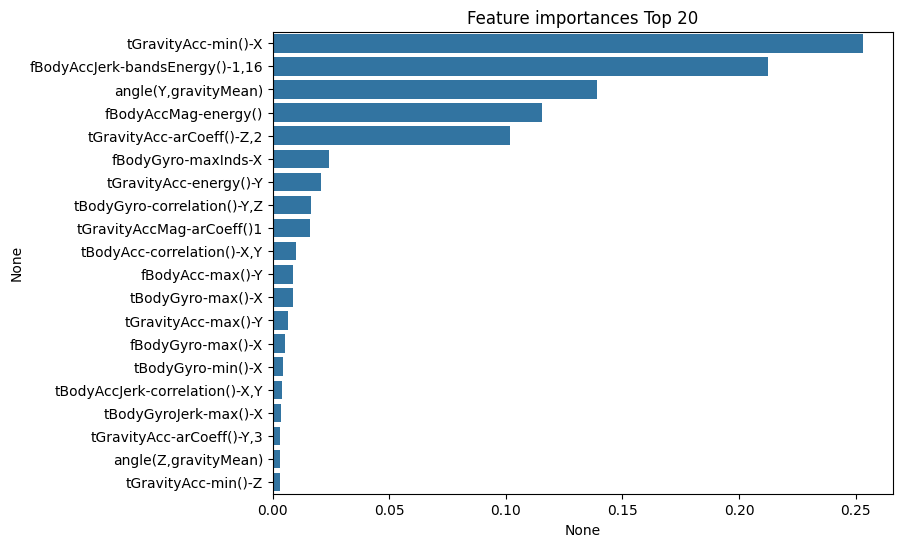

In [31]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- 가장 높은 중요도를 가진 Top 5 피처들이 매우 중요하게 규칙 생성에 영향을 미침